In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers ,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
classes = [ "airplane" , "automobile" ,"bird", "cat", "deer", "dog" ,"frog" ,"horse" ,"ship" ,"truck"]

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

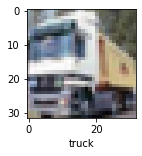

In [8]:
plot_sample(x_train,y_train,1)

In [9]:
x_train =x_train/255
x_test = x_test/255


In [10]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.0 MB/s 


In [11]:
import tensorflow_addons as tfa

In [12]:
opt=tfa.optimizers.Yogi(learning_rate= 0.01,
    beta1= 0.9,
    beta2= 0.999,
    epsilon= 0.001,
    l1_regularization_strength= 0.0,
    l2_regularization_strength= 0.0,
    initial_accumulator_value= 1e-06,
    activation = 'sign',
    name= 'Yogi',
)

In [13]:
model = keras.Sequential(
    [
     layers.Conv2D(filters=64,kernel_size=(3,3), activation ='relu' ,input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     keras.layers.Flatten(),
     keras.layers.Dense(32,activation ="relu"),
     keras.layers.Dense(10 ,activation ="softmax"),
     
    ]
)

model.compile(optimizer = opt,
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 23s 5ms/step - loss: 1.7508 - accuracy: 0.3507
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5446 - accuracy: 0.4353
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4767 - accuracy: 0.4613
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4266 - accuracy: 0.4827
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3895 - accuracy: 0.4988


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report: \n" , classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.51      0.57      0.54      1000
           1       0.57      0.66      0.61      1000
           2       0.44      0.30      0.36      1000
           3       0.33      0.33      0.33      1000
           4       0.42      0.45      0.43      1000
           5       0.46      0.33      0.39      1000
           6       0.56      0.64      0.59      1000
           7       0.48      0.64      0.55      1000
           8       0.77      0.26      0.39      1000
           9       0.49      0.71      0.58      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4131 - accuracy: 0.4891


[1.4130908250808716, 0.48910000920295715]

In [16]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3517 - accuracy: 0.5158
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3314 - accuracy: 0.5238
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3139 - accuracy: 0.5301
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2910 - accuracy: 0.5417
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2790 - accuracy: 0.5483
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2632 - accuracy: 0.5553
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2474 - accuracy: 0.5595
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2413 - accuracy: 0.5644
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2237 - accuracy: 0.5690
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.220

In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2395 - accuracy: 0.5681


[1.2394601106643677, 0.5680999755859375]

In [18]:
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2009 - accuracy: 0.5789
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1919 - accuracy: 0.5824
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1747 - accuracy: 0.5907
Epoch 4/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1628 - accuracy: 0.5948
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1468 - accuracy: 0.5992
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1392 - accuracy: 0.6045
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1289 - accuracy: 0.6046
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1199 - accuracy: 0.6091
Epoch 9/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1186 - accuracy: 0.6109
Epoch 10/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.116

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2407 - accuracy: 0.5903


[1.2407323122024536, 0.5903000235557556]

In [20]:
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0623 - accuracy: 0.6329
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0449 - accuracy: 0.6400
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0539 - accuracy: 0.6331
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0473 - accuracy: 0.6366
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0321 - accuracy: 0.6420
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0398 - accuracy: 0.6412
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0308 - accuracy: 0.6462
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0308 - accuracy: 0.6457
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0224 - accuracy: 0.6472
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.018

In [21]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1369 - accuracy: 0.6280


[1.1369092464447021, 0.628000020980835]

In [22]:
model.fit(x_train,y_train, epochs=70)

Epoch 1/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9241 - accuracy: 0.6868
Epoch 2/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9258 - accuracy: 0.6875
Epoch 3/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9320 - accuracy: 0.6837
Epoch 4/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9249 - accuracy: 0.6860
Epoch 5/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9163 - accuracy: 0.6869
Epoch 6/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9181 - accuracy: 0.6891
Epoch 7/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9210 - accuracy: 0.6861
Epoch 8/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9125 - accuracy: 0.6904
Epoch 9/70
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9047 - accuracy: 0.6929
Epoch 10/70
1563/1563 [==============================] - 9s 5ms/step - loss: 0.911

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1768 - accuracy: 0.6230


[1.1767677068710327, 0.6230000257492065]

In [24]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8480 - accuracy: 0.7140
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8464 - accuracy: 0.7145
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8412 - accuracy: 0.7166
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8423 - accuracy: 0.7142
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8372 - accuracy: 0.7172
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8406 - accuracy: 0.7174
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8343 - accuracy: 0.7167
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8414 - accuracy: 0.7169
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8343 - accuracy: 0.7174
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2447 - accuracy: 0.6327


[1.2447209358215332, 0.6327000260353088]